In [1]:
import sys
sys.path.append("../python/recoai_visual_search/")
from visual_search import RecoAIVisualSearch
from models import *
import json
from glob import glob
import ipyplot
from matplotlib import pyplot as plt
from tqdm import tqdm

Creating a collection to keep the images 
-------------

In this case we are using MOBILE_NET_V2 as the feature extractor. 

In [7]:
api = RecoAIVisualSearch(bearer_token="secrettoken", address="http://localhost:8890")
upsert_collection = UpsertCollection(
    config=GenericModelConfig(
        model_architecture=ModelArchitecture.MOBILE_NET_V2
    ), 
    name="images"
)
response = api.upsert_collection(upsert_collection)

Indexing local images
-----------

It is possible to index local images using `ImageBytes` or `ImageSource(url="link_to_image")`

In [41]:
for img_path in tqdm(sorted(glob("../../images/ecommerce-images/data/Apparel/Boys/Images/images_with_product_ids/*.jpg"))):
    image_id = img_path.split("/")[-1].split(".")[0]
    with open(img_path, "rb") as inp:
        image_bytes = list(inp.read())
    image_source = ImageSource(image_bytes=ImageBytes(image_bytes))
    add_image = AddImage(collection_name="images", id=image_id, source=image_source)
    resp = api.add_image(add_image)

100%|██████████| 759/759 [01:58<00:00,  6.42it/s]


Searching for a cat 
-----------


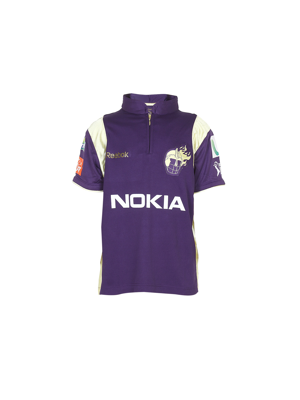


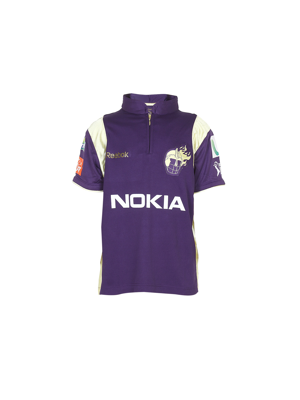

In [42]:
img = plt.imread("../../images/ecommerce-images/data/Apparel/Boys/Images/images_with_product_ids/10054.jpg")
ipyplot.plot_images([img], img_width=300)

In [43]:
with open("../../images/ecommerce-images/data/Apparel/Boys/Images/images_with_product_ids/10054.jpg", "rb") as inp:
    image_bytes = list(inp.read())
image_source = ImageSource(image_bytes=ImageBytes(image_bytes))
search_image = SearchImage(collection_name="images", n_results=8, source=image_source)
%time search_results = json.loads(api.search_image(search_image).content)
search_results

CPU times: user 187 ms, sys: 11 µs, total: 187 ms
Wall time: 430 ms


{'collection_name': 'images',
 'results': [{'id': '10054', 'similarity': 0},
  {'id': '4728', 'similarity': 1093241214},
  {'id': '4202', 'similarity': 1093312557},
  {'id': '52121', 'similarity': 1093681515},
  {'id': '50718', 'similarity': 1093681515},
  {'id': '35999', 'similarity': 1094314830},
  {'id': '24909', 'similarity': 1094343361},
  {'id': '34183', 'similarity': 1094374909}]}


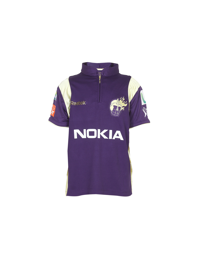
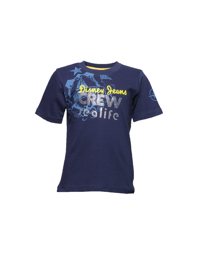
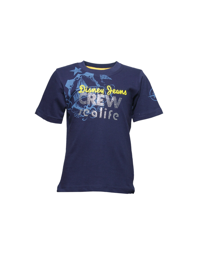
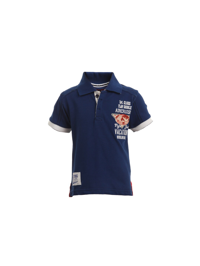
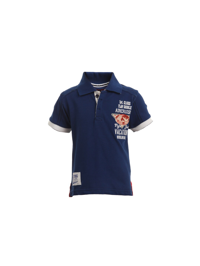
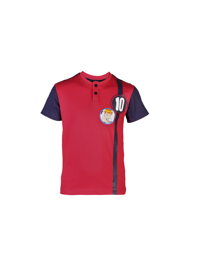
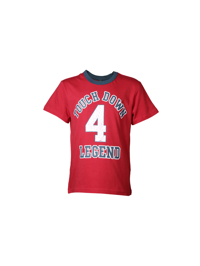
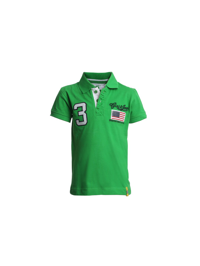


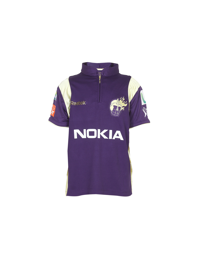
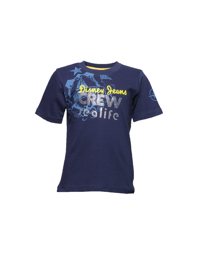
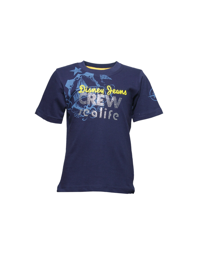
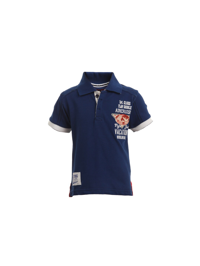
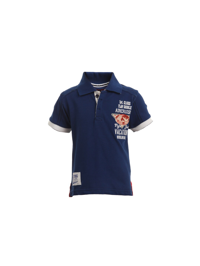
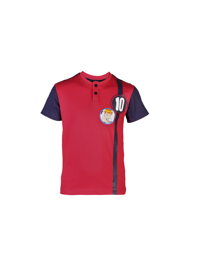
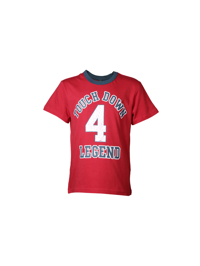
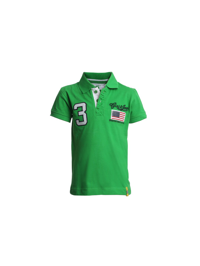

In [45]:
images_paths = []
for result in search_results["results"]:
    fn = "../../images/ecommerce-images/data/Apparel/Boys/Images/images_with_product_ids/{}.jpg".format(result["id"])
    img = plt.imread(fn)
    images_paths.append(img)    
ipyplot.plot_images(images_paths, img_width=200)